<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Gonzalo Claro
- Camilo Meneses


### [Link de repositorio de GitHub](https://github.com/GonzaloClaro/evaluaciones_mds7202_grupo23)


## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [133]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/Othercomputers/Camilo!/Universidad/Laboratorio de Programación Científica para Ciencia de Datos/Laboratorios/Laboratorio 5/Archivos/'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [135]:
df_retail = pd.read_pickle(path+"online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [136]:
df_retail[df_retail["StockCode"]==85048]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
400,C489518,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 11:35:00,7.95,15461.0,United Kingdom
626,C489528,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 11:50:00,7.95,16714.0,United Kingdom
1134,C489551,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2009-12-01 12:35:00,6.95,17641.0,United Kingdom
1256,489559,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 12:55:00,6.95,17056.0,United Kingdom
...,...,...,...,...,...,...,...,...
523546,538068,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2010-12-09 14:05:00,7.95,17978.0,United Kingdom
524636,C538109,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2010-12-09 15:23:00,7.95,16042.0,United Kingdom
524668,538116,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2010-12-09 15:32:00,7.95,13327.0,United Kingdom
524884,538148,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2010-12-09 16:26:00,16.98,NaN,United Kingdom


In [137]:
df_retail[df_retail['Customer ID']==13085]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
74409,496166,79323W,WHITE CHERRY LIGHTS,8,2010-01-29 11:42:00,6.75,13085.0,United Kingdom
74410,496166,21137,BLACK RECORD COVER FRAME,8,2010-01-29 11:42:00,3.75,13085.0,United Kingdom
74411,496166,22041,"RECORD FRAME 7"" SINGLE SIZE",6,2010-01-29 11:42:00,2.55,13085.0,United Kingdom
74412,496166,40046A,RED DAISY PAPER LAMPSHADE,12,2010-01-29 11:42:00,1.25,13085.0,United Kingdom


In [138]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [139]:
df_retail["Invoice"].cat.categories

Index([   489434,    489435,    489436,    489437,    489438,    489439,
          489440,    489441,    489442,    489443,
       ...
       'C538112', 'C538114', 'C538115', 'C538118', 'C538119', 'C538121',
       'C538122', 'C538123', 'C538124', 'C538164'],
      dtype='object', length=28816)

In [140]:
df_retail["Customer ID"].cat.categories

Float64Index([12346.0, 12347.0, 12348.0, 12349.0, 12351.0, 12352.0, 12353.0,
              12355.0, 12356.0, 12357.0,
              ...
              18277.0, 18278.0, 18279.0, 18280.0, 18281.0, 18283.0, 18284.0,
              18285.0, 18286.0, 18287.0],
             dtype='float64', length=4383)

Se tienen 525461 filas de datos con las siguientes 8 columnas:

- **Invoice:** Corresponde al número de factura. No posee datos nulos. El tipo de datos es *categórico*.

- **StockCode:** Corresponde al código del producto. No posee datos nulos. El tipo de datos es *categórico*.

- **Description:** Corresponde a la descripción del producto. No posee datos nulos. El tipo de datos es *string*.

- **Quantity:** Corresponde a la cantidad del producto comprado por el cliente. No posee datos nulos, pero si valores negativos (no debería ser posible). El tipo de datos es *entero*.

- **InvoiceDate:** Corresponde a la fecha y hora de la compra. No posee datos nulos. El tipo de datos es *datetime*.

- **Price:** Corresponde al precio por unidad del producto en esa fecha. No posee datos nulos. El tipo de datos es *float*.

- **Customer ID:** Corresponde al ID asociado a ese comprador. Posee 107.927 datos nulos. El tipo de datos es *float*.

- **Country:** Corresponde al país del comprador. No posee datos nulos. El tipo de datos es *string*.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis multivariable estudia como se comporta una variable respecto a otras. El análisis univariable estudia una sola variable, mediante resumenes estadísticos o análisis de su distribución con los datos. El análsis de datos faltantes permite sintetizar la información de estos, para luego poder filtralos o inputarlos. Estos análisis permiten estudiar el comportamiento de las variables para determinar cuales utilizar, mostrando outliers o datos faltantes, que conduzcan a el correcto manejo de estos.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [141]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

#### Invoice profile

In [142]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Se grafican las 100 boletas con mayores productos distintos. Se tiene que la boleta número 537434 posee un total de 675 productos distintos. A su vez, exiten 28816 boletas distintas. Este comportamiento es esperable, ya que en retail la gente tiende a llevar más de un producto a la vez.

#### StockCode profile

In [143]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Se grafican los 100 productos con mayor cantidad de apariciones en boletas distintas. Se tiene que el producto de código 85123A aparece en un total de 3516 boletas distintas (máximo de todos). A su vez, exiten 4632 productos distintos.

#### Description profile

In [144]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Se grafican las 100 descripciones de productos que aparecen en boletas distintas. No se tienen datos nulos, pero si se tiene la descripción "*nan*", así que en la práctica si faltan. Este gráfico debe ser igual al de StockCode (asumiendo que no cambia la descripción de un producto) ya que es una única descripción por producto, pero no es exactamente igual por la descripción "*nan*".

#### Quantity profile

In [145]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Se grafican las cantidad de los distintos productos comprados por cada boleta. Así los datos se concentran en las cantidades más bajas porque la gente tiende a comprar pocas unidades de productos típicos del retail. A su vez, no existen valor en 0, ya que si están en el dataset deberían estar en al menos una boleta y por ende aparecer como mínimo una vez. Existen outliers, los cuales representan compras de centenares de unidades de un producto en dicha boleta. El promedio de unidades comprada de cada producto por boleta es aproximadamente 10 (considerando outliers). Por otra parte, no existen datos nulos, pero si cantidades negativos, las cuales claramente representan un error en el dataset.

#### InvoiceDate profile

In [146]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Se grafican la cantidad de boletas por rangos de fechas. En general se aprecia una cantidad promedio constante de boletas por unidad de tiempo, a excepción del periodo [20.12.2009 - 02.01.2010] donde se registró una importante baja y el periodo [07.11.2010 - 20.11.2010] donde se registro una importante alza de boletas.

#### Price profile

In [147]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Se observa la presencia de outliers, los cuales impiden la visualización del boxplot. A su vez, existen datos que toman valores negativos o cero, lo cual implicaría que los productos son gratis, es decir, es un claro error. La mayoría de los datos se concentra en el rango de precios [0.5 - 4.49]. La moda se da en el rango de [0.5 - 1.49] y el valor promedio es 4.688834.

#### Customer ID profile

In [148]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Se grafica la cantidad de boletas de cada usuario (según su ID asociado). Se tiene pequeña cantidad de usuarios que compran muchas veces, mientras que el resto en general mantiene una cantidad de compras promedio. Recordar, como se dijo en la sección pasada, existe una gran cantidad de datos nulos.

#### Country profile

In [149]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Se grafica la cantidad de boletas según la nacionalidad de los usuarios. Se aprecia que prácticamente el 100% de las boletas son de UK, por ende, podemos asumir que la tienda es de dicho país. Además, se presentan otras 39 nacionalidades, pero son muy minoritarias.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [150]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

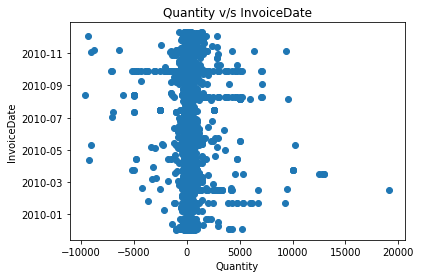

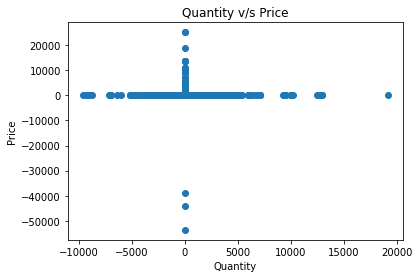

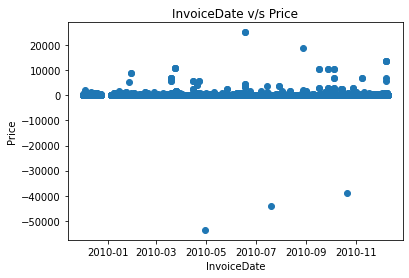

## Correlation:

## Missing Matrix:

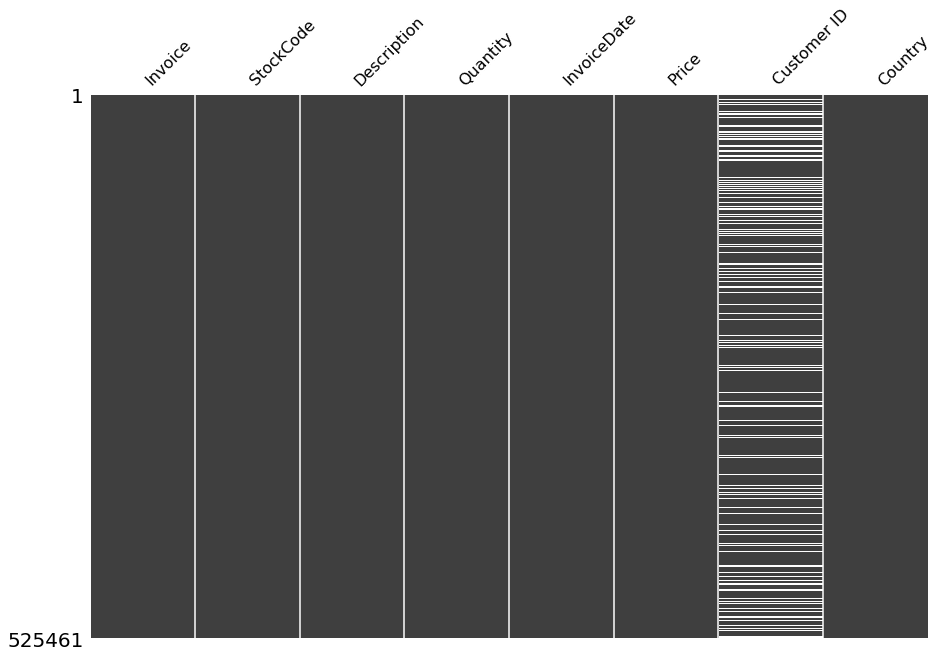

In [151]:
profile_df(df_retail)

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [152]:
def limpiar(dataset):
  df = dataset.copy() #copiamos el dataframe
  df = df[(df['Price']>0) & (df['Price']<=300)] #eliminamos boletas con productos de precios fuera de (0,300]
  df = df[(df['Quantity']>0) & (df['Quantity']<=200)] #dejamos solo cantidades positivas
  df = df.dropna(subset = ['Quantity', 'Price']) #eliminamos NaNs
  df = df.reset_index(drop=True) #reseteamos indices
  return df

In [153]:
df_limpio = limpiar(df_retail)

In [154]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509017 entries, 0 to 509016
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      509017 non-null  category      
 1   StockCode    509017 non-null  category      
 2   Description  509017 non-null  object        
 3   Quantity     509017 non-null  int64         
 4   InvoiceDate  509017 non-null  datetime64[ns]
 5   Price        509017 non-null  float64       
 6   Customer ID  405333 non-null  category      
 7   Country      509017 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.9+ MB


In [155]:
profile_serie(df_limpio["Invoice"])

## Invoice Profile

Type                           category
Number of observations           509017
Unique                            20558
Top                              537434
Freq                                674
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   507144
Duplicate rows (%)              99.63 %
Total size in memory      2305498 bytes
dtype: object

In [156]:
profile_serie(df_limpio['StockCode'])

## StockCode Profile

Type                           category
Number of observations           509017
Unique                             4246
Top                              85123A
Freq                               3394
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508845
Duplicate rows (%)              99.97 %
Total size in memory      1187354 bytes
dtype: object

In [157]:
profile_serie(df_limpio['Description'])

## Description Profile

Type                                                  object
Number of observations                                509017
Unique                                                  4528
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3428
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        508839
Duplicate rows (%)                                   99.97 %
Total size in memory                           4072264 bytes
dtype: object

In [158]:
profile_serie(df_limpio['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         509017.0
Mean                           8.702214
Std                           16.655841
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                               200.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          43.447743
Skew                           5.680179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508996
Duplicate rows (%)              100.0 %
Total size in memory      4072264 bytes
dtype: object

In [159]:
profile_serie(df_limpio['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           509017
Mean                      2010-06-29 00:33:25.061716480
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 15:56:00
50%                                 2010-07-07 10:33:00
75%                                 2010-10-17 10:13:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   507443
Duplicate rows (%)                              99.69 %
Total size in memory                      4072264 bytes
dtype: object

In [160]:
profile_serie(df_limpio['Price'])

## Price Profile

Type                            float64
Number of observations         509017.0
Mean                           3.615801
Std                            6.904992
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                              297.57
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         700.661342
Skew                          21.554788
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   508344
Duplicate rows (%)              99.87 %
Total size in memory      4072264 bytes
dtype: object

In [161]:
profile_serie(df_limpio['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         405333.0
Unique                           4284.0
Top                             14911.0
Freq                             5552.0
                                       
Missing cells                    103684
Missing cells (%)               20.37 %
Duplicate rows                   508929
Duplicate rows (%)              99.98 %
Total size in memory      1185362 bytes
dtype: object

In [162]:
profile_serie(df_limpio['Country'])

## Country Profile

Type                              object
Number of observations            509017
Unique                                40
Top                       United Kingdom
Freq                              471497
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    509017
Duplicate rows (%)               100.0 %
Total size in memory       4072264 bytes
dtype: object

## Bivariant Analysis:

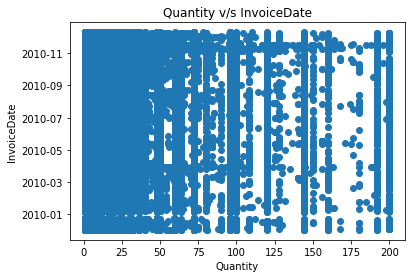

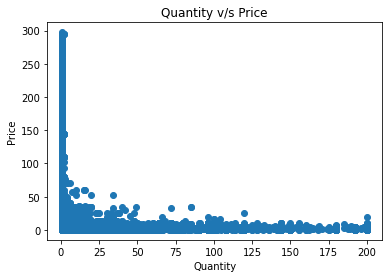

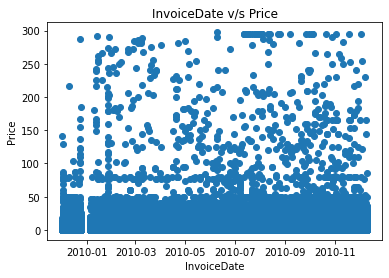

## Correlation:

## Missing Matrix:

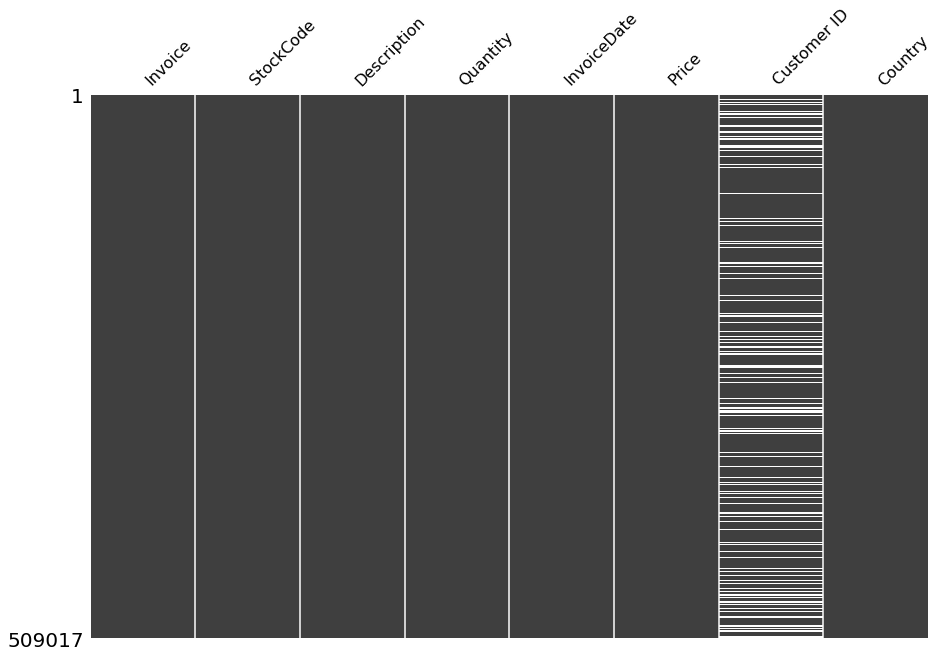

In [163]:
profile_df(df_limpio)

Para la variable Quantity en diferencia con respecto al gráfico sin limpieza, se tiene que ya no hay cantidades negativas, y no se observa una gran cantidad de outliers, ya que fueron filtrados.

Para la variable invoiceDate se filtran los datos negativos.

En el gráfico de Quantity vs Price, se observa claramente la existencia de productos con alta demanda y bajo precio, mientras que los productos con altos precios tienen baja demanda, lo cual no se observaba antes de la limpieza.

En el gráfico de InvoiceDAte vs Quantity ahora el posible visualizar que durante todos los días del año se tienen boletas de 50 productos o menos.

En cuanto a la matriz de correlación no se observa un cambio. En esta se ve claramente que no existe una correlación entre la variable Quantity y Price.

Para la missing matrix no se presentas cambios sustanciales cuando se limpian los datos. Se tiene que solo la columna customerID presenta NaNs, debido a que esas personas no están registradas en el supermercado.

Finalmente, se tiene que al filtrar los datos ahora se tienen 509.017 filas en vez de las 525.461 filas originales.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [201]:
top_30 = df_limpio.copy() #copiamos el dataframe
top_30['Ganancia'] = top_30['Quantity'] * top_30['Price'] #calculamos las ganancias
top_30 = top_30.groupby(['Description']).sum().sort_values('Ganancia',ascending= False).reset_index().loc[:29] #agrupamos por producto sumando las columnas, ordenamos descendente por ganancia y selecionamos los primeros 30

In [202]:
top_30

,Description,Quantity,Price,Ganancia
0,REGENCY CAKESTAND 3 TIER,12598,29330.50,158033.51
1,WHITE HANGING HEART T-LIGHT HOLDER,47417,10569.35,131101.41
2,DOTCOM POSTAGE,632,64749.98,64749.98
3,ASSORTED COLOUR BIRD ORNAMENT,34527,2861.65,56928.30
4,JUMBO BAG RED RETROSPOT,26805,2824.87,49995.51
5,POSTAGE,2307,18740.41,47986.66
6,PARTY BUNTING,9829,5787.86,47315.44
7,PAPER CHAIN KIT 50'S CHRISTMAS,12685,3323.39,40877.60
8,STRAWBERRY CERAMIC TRINKET BOX,25615,2496.88,32798.20
9,VINTAGE UNION JACK BUNTING,3748,7753.68,32506.75


In [208]:
figura = px.bar(top_30, y='Ganancia', x='Description')
figura.show()

In [207]:
figura = px.bar(top_30, y='Quantity', x='Description')
figura.show()

El producto que entrega mayores ganancias es *REGENCY CAKESTAND 3 TIER* (158k de ganancias), a su vez, este producto es el segundo más vendido.

El producto más vendido es *WHITE HANGING HEART T-LIGHT HOLDER* el cual corresponde al segundo producto que genera más ganancias (131k de ganancias).

De este modo, y viendo las diferencias en los gráficos, es posible reconocer una relación directa entre cantidad de ventas y ganancias, pero no se cumple que los artículos más vendidos son los mismos que generan más ganancias.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [209]:
def plot_ventas(dataframe):
    df = limpiar(dataframe).copy() #limpiamos el dataset
    df['Ganancias'] = df['Quantity'] * df['Price'] #calculamos ganancias
    df = df.groupby([df['InvoiceDate'].dt.date]).sum().reset_index() #agrupamos por fecha sumando columnas
    fig = px.line(df, x='InvoiceDate', y='Ganancias') #creamos el gráfico
    fig.show() #mostramos

In [210]:
plot_ventas(df_retail)

A pesar de que las ganancias fluctuan bastante entre los días, la tendencia es al alza en los meses finales del año (noviembre y diciembre), probablemente por las festividades. Además, se observa que no se tienen datos entre el 23 de diciembre de 2009 y el 7 de enero de 2010, lo cual lleva a la gráfica a presentar una caída en dicha temporalidad.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>